In [3]:
# import
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.optimize import curve_fit
import math

In [4]:
# Enable LaTeX rendering
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern Roman'
plt.rcParams['text.latex.preamble'] = r"\usepackage{amsmath}"

In [5]:
# funktionen
def simple_plot(x,y):
    # Create some data

    # Plot
    plt.plot(x, y, label=r'$\sin(x)$')
    plt.xlabel(r'$x$')
    plt.ylabel(r'$\sin(x)$')
    plt.title(r'Plot of $\sin(x)$ using LaTeX')
    plt.legend()
    plt.show()

# plot with one axis
# col1="#1f77b4", col2="#ff7f0e", marker_type="o", marker_size="5"
def plot_with_one_axis(data_x, data_y, name_x, name_y, plot_title="title", filename_to_save="nopdf", label="nolabel", linstyle="-", colorr="#1f77b4", marker_type="o", marker_size="5"):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle=linstyle, color=colorr, markersize=marker_size) # color='red') 
    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".svg"
        plt.savefig(fnts)

    plt.show()

def plot_with_one_axis_with_points(data_x, data_y, name_x, name_y, p1_x, p1_y, p2_x, p2_y, plot_title="title", filename_to_save="nopdf", label="nolabel", marker_type="o", marker_size="5", main_color="#1f77b4"):
    plt.figure()  # No need for subplots when using a single axis
    # col1="#1f77b4", col2="#ff7f0e", marker_type="o", marker_size="5"

    # Plot data
    plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle='', markersize=marker_size, color=main_color) 
    # plt.plot(0.096,58.496, label=f"$x = 0.096$ mm", marker='o', markersize=6)
    # plt.plot(0.166,16.31, label=f"$x = 0.166$ mm", marker='o', markersize=6)
    plt.plot(p1_x,p1_y, label=f"$x = 0.096$ mm", marker='o', markersize=6, color = "orange")
    plt.plot(p2_x,p2_y, label=f"$x = 0.166$ mm", marker='o', markersize=6, color = "green")
    

    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()

def plot_with_one_axis_twoY(data_x_1, data_y_1, data_x_2, data_y_2,  name_x, name_y, plot_title="title", filename_to_save="nopdf", line_style1="", line_style2="-", label1="nolabel", label2="nolabel", col1="#1f77b4", col2="#ff7f0e", marker_type="o", marker_size="5"):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.plot(data_x_1, data_y_1, label=label1, marker=marker_type, linestyle=line_style1, markersize=marker_size, color=col1) # color='red') 
    plt.plot(data_x_2, data_y_2, label=label2, color=col2, linestyle=line_style2) #, marker='o', linestyle='') # color='red') 
    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()

def plot_with_one_axis_threeY(data_x_1, data_y_1, data_x_2, data_y_2, data_x_3, data_y_3, name_x, name_y, plot_title="title", filename_to_save="nopdf", line_style="", label1="nolabel", label2="nolabel", label3="nolabel", col1="#1f77b4", col2="#ff7f0e", col3="#ff7f0e", marker_type="o", marker_size="5"):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.plot(data_x_1, data_y_1, label=label1, marker=marker_type, linestyle=line_style, markersize=marker_size, color=col1) # color='red') 
    plt.plot(data_x_2, data_y_2, label=label2, color=col2, linestyle="-") 
    plt.plot(data_x_3, data_y_3, label=label3, color=col3, linestyle="-")

    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()

def plot_with_one_axis_and_two_fits(data_x, data_y, x_fit_1, y_fit_1, x_fit_2, y_fit_2, name_x, name_y, main_color="#1f77b4", colorfit1="orange", colorfit2="green", plot_title="title", filename_to_save="nopdf", label="nolabel", marker_type="o", marker_size="5"):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle='', markersize = marker_size, color=main_color) 
    plt.plot(x_fit_1, y_fit_1, color=colorfit1)
    plt.plot(x_fit_2, y_fit_2, color=colorfit2)
    
    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()




def plot_with_one_axis_twoY_and_error_bars(data_x_1, data_y_1, data_y_1_error, data_x_2, data_y_2,  name_x, name_y, plot_title="title", filename_to_save="nopdf", line_style="", label1="nolabel", label2="nolabel", col1="#1f77b4", col2="#ff7f0e", marker_type="o", marker_size="5", capsize_errorbars=5):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data
    plt.errorbar(data_x_1, data_y_1, yerr=data_y_1_error, fmt=marker_type, label=label1, capsize=capsize_errorbars, color=col1)
    # plt.plot(data_x_1, data_y_1, label=label1, marker=marker_type, linestyle=line_style, markersize=marker_size, color=col1) # color='red') 
    plt.plot(data_x_2, data_y_2, label=label2, color=col2, linestyle="-") #, marker='o', linestyle='') # color='red') 



    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()

# plot with two axes
def plot_with_two_axes(data_x,data_y_one, data_y_two, name_x, name_y1, name_y2, plot_title="title", filename_to_save="nopdf", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3"):
    fig, ax1 = plt.subplots() 
    
    ax1.set_xlabel(name_x) 
    ax1.set_ylabel(name_y1, color = col1) 
    plot_1 = ax1.plot(data_x, data_y_one, color = col1, label=label1) 

    ax1.tick_params(axis ='y') #, labelcolor = 'red') 
    
    
    #ax1.set_xlim([xmin, xmax])
    #ax1.set_ylim([ymin1, ymax1])

    ax2 = ax1.twinx() 
    ax2.set_ylabel(name_y2, color = col3) 
    # test second graph on y

    plot_2 = ax2.plot(data_x, data_y_two, color = col3, label = label3) 
    ax2.tick_params(axis ='y') #, labelcolor = 'blue') 
    

    #ax1.set_xlim([xmin, xmax])
    #ax2.set_ylim([ymin2, ymax2])
    
    fig.tight_layout()

    lns = plot_1 + plot_2
    labels = [l.get_label() for l in lns]
    
    plt.title(plot_title)
    plt.legend(lns, labels, loc=0)

    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)
    
    plt.show()

# plot with two axes
def plot_with_two_axes_with_fit(data_x,data_y_one, data_x_fit, data_y_one_fit, data_y_two, name_x, name_y1, name_y2, plot_title="title", filename_to_save="nopdf", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3"):
    fig, ax1 = plt.subplots() 
    
    ax1.set_xlabel(name_x) 
    ax1.set_ylabel(name_y1, color = col1) 
    plot_1 = ax1.plot(data_x, data_y_one, color = col1, label=label1) 
    plot_1_dash = ax1.plot(data_x_fit, data_y_one_fit, color = col2, label = label2) 

    ax1.tick_params(axis ='y') #, labelcolor = 'red') 
    
    
    #ax1.set_xlim([xmin, xmax])
    #ax1.set_ylim([ymin1, ymax1])

    ax2 = ax1.twinx() 
    ax2.set_ylabel(name_y2, color = col3) 
    # test second graph on y

    plot_2 = ax2.plot(data_x, data_y_two, color = col3, label = label3) 
    ax2.tick_params(axis ='y') #, labelcolor = 'blue') 
    

    #ax1.set_xlim([xmin, xmax])
    #ax2.set_ylim([ymin2, ymax2])
    
    fig.tight_layout()

    lns = plot_1 + plot_1_dash + plot_2
    labels = [l.get_label() for l in lns]
    
    plt.title(plot_title)
    plt.legend(lns, labels, loc=0)

    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)
    
    plt.show()

def plot_with_one_axis_twoY_with_point_from_list(lll): # data_x_1, data_y_1, data_x_2, data_y_2,  name_x, name_y, plot_title="title", filename_to_save="nopdf", line_style="", label1="nolabel", label2="nolabel", col1="#1f77b4", col2="#ff7f0e", marker_type="o", marker_size="5", plot_point="nopoint"): #, xmin=0, xmax=500000, ymin=0, ymax=1000):
    
    l = lll
    
    plt.figure()  # No need for subplots when using a single axis
    
    for l in lll:
        #data_x_1, data_y_1, data_x_2, data_y_2, name_x, name_y, plot_title, filename_to_save, 
        data_x_1, data_y_1, data_x_2, data_y_2, name_x, name_y, plot_title, filename_to_save, line_style, label1, label2, col1, col2, marker_type, marker_size, plot_point = l

        # Plot data
        plt.plot(data_x_1, data_y_1, label=label1, marker=marker_type, linestyle=line_style, markersize=marker_size, color=col1) # color='red') 
        plt.plot(data_x_2, data_y_2, label=label2, marker=marker_type, color=col2, linestyle=line_style, markersize=marker_size) #, marker='o', linestyle='') # color='red') 
        
        if plot_point != "nopoint":
            # xx, yy = plot_point
            xx, yy, labell, markerr, markersizee, colorr = plot_point

            plt.plot(xx, yy, label=labell, marker=markerr, markersize=markersizee, color=colorr)

            #plt.plot(xx, yy, label="HALLO", markersize=10)

    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".pdf"
        plt.savefig(fnts)

    plt.show()

def plot_with_two_axes_with_N_curves(data_x, data_y_one:list, data_y_two:list, name_x, name_y1, name_y2, plot_title="title", filename_to_save="nopdf", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3"):
    fig, ax1 = plt.subplots() 
    
    ax1.set_xlabel(name_x) 
    ax1.set_ylabel(name_y1, color = col1) 

    # Plot data on the first y-axis
    #     [f3_qcmd_30_70_SC, "f3"],

    plot_1 = []
    for i, d1 in enumerate(data_y_one):
        if d1[1] == "f7":
            plot_1.append(ax1.plot(data_x, d1[0], color = col1, label=d1[1]))
        else:
            plot_1.append(ax1.plot(data_x, d1[0], color = col1, label=d1[1], alpha=0.1))


    
    ax1.tick_params(axis='y') 
    
    # Create the second y-axis
    ax2 = ax1.twinx() 
    ax2.set_ylabel(name_y2, color = col3)

    # Plot data on the second y-axis
    plot_2 = []
    # for i, d2 in enumerate(data_y_two):
    #     plot_2.append(ax2.plot(data_x, d2, color = col3, label=f"{label3}_{i+1}"))
    
    for i, d2 in enumerate(data_y_two):
        if d2[1] == "d7":
            plot_2.append(ax2.plot(data_x, d2[0], color=col3, label=d2[1]))
        else:
            plot_2.append(ax2.plot(data_x, d2[0], color=col3, label=d2[1], alpha=0.1))
            
    ax2.tick_params(axis='y') 
    
    fig.tight_layout()

    # Flatten lists of plot lines to merge them for the legend
    lns = [line for sublist in plot_1 for line in sublist] + [line for sublist in plot_2 for line in sublist]
    labels = [l.get_label() for l in lns]
    
    plt.title(plot_title)
    plt.legend(lns, labels, loc=0)

    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".svg"
        plt.savefig(fnts)
    
    plt.show()


def plot_with_two_axes_with_N_curves_with_VERTICAL_lines(data_x, data_y_one:list, data_y_two:list, name_x, name_y1, name_y2, plot_title="title", filename_to_save="nopdf", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=None):
    fig, ax1 = plt.subplots() 
    
    ax1.set_xlabel(name_x) 
    ax1.set_ylabel(name_y1, color=col1) 

    # Plot data on the first y-axis
    plot_1 = []
    for i, d1 in enumerate(data_y_one):
        if d1[1] == "f7":
            plot_1.append(ax1.plot(data_x, d1[0], color=col1, label=d1[1]))
        else:
            plot_1.append(ax1.plot(data_x, d1[0], color=col1, label=d1[1], alpha=0.1))

    ax1.tick_params(axis='y') 
    
    # Create the second y-axis
    ax2 = ax1.twinx() 
    ax2.set_ylabel(name_y2, color=col3)

    # Plot data on the second y-axis
    plot_2 = []
    for i, d2 in enumerate(data_y_two):
        if d2[1] == "d7":
            plot_2.append(ax2.plot(data_x, d2[0], color=col3, label=d2[1]))
        else:
            plot_2.append(ax2.plot(data_x, d2[0], color=col3, label=d2[1], alpha=0.1))
            
    ax2.tick_params(axis='y') 
    
    fig.tight_layout()

    # Flatten lists of plot lines to merge them for the legend
    lns = [line for sublist in plot_1 for line in sublist] + [line for sublist in plot_2 for line in sublist]
    labels = [l.get_label() for l in lns]
    
    plt.title(plot_title)
    plt.legend(lns, labels, loc=0)

    # Plot vertical lines based on vlines parameter
    if vlines:
        for x_val, color, linestyle in vlines:
            ax1.axvline(x=x_val, color=color, linestyle=linestyle)

    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".svg"
        plt.savefig(fnts)
    
    plt.show()

# SAPD

-17.72758114732271


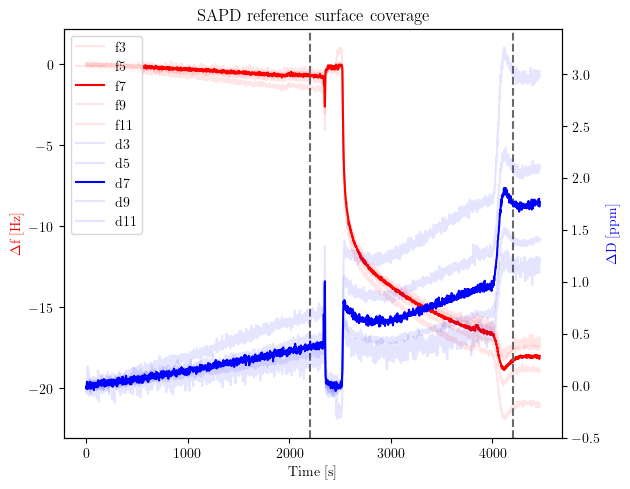

In [6]:
# SAPD reference surface coverage

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/SAPD reference surface coverage.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:1268])
avg_red2 = np.average(f7_qcmd_30_70_SC[2423:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="SAPD reference surface coverage", filename_to_save="python_figures/SAPD reference surface coverage", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[2200, "dimgray", "--"], [4200, "dimgray", "--"]])



-96.69271376474498


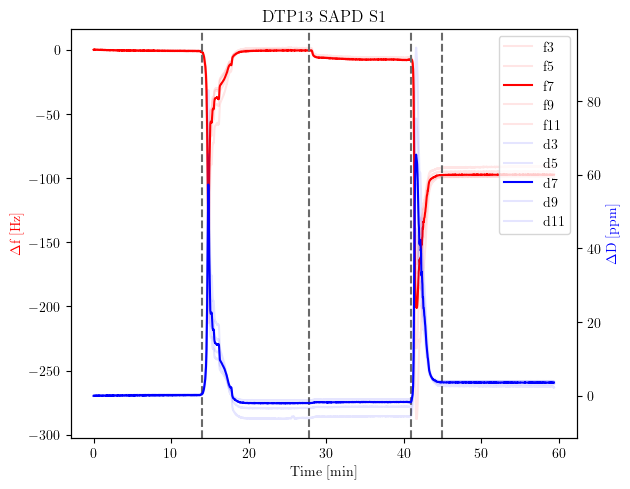

In [7]:
# DTP13 SAPD S1.csv

f_path = "data/Linus & Alicia miniLB and QCM/Linus & Alicia as csv/DTP13 SAPD method Alicia and Linus 240926/DTP13 SAPD S1.csv"

qcmd_30_70 = pd.read_csv(f_path, sep=',')

t_qcmd_30_70_SC = qcmd_30_70.Time_min

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

# d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

# red1: 0-14 = 0
# red2: 45-end



avg_red1 = np.average(f7_qcmd_30_70_SC[0:962])
avg_red2 = np.average(f7_qcmd_30_70_SC[2867:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)


plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SAPD S1", filename_to_save="python_figures/DTP13 SAPD S1", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[14, "dimgray", "--"], [27.8, "dimgray", "--"], [41, "dimgray", "--"], [45, "dimgray", "--"]])


-84.56504386547661


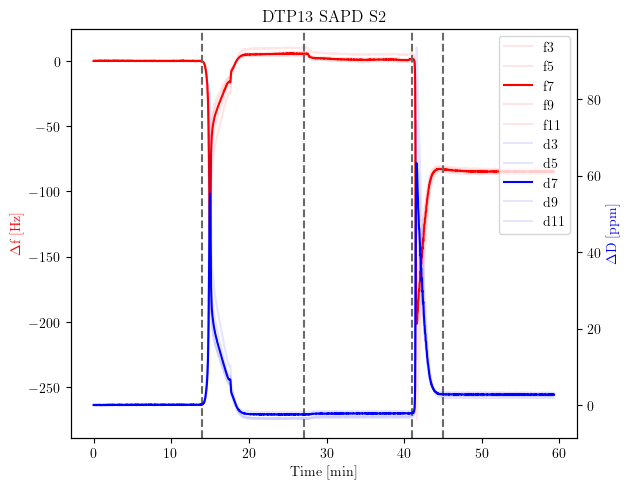

In [8]:
# DTP13 SAPD S2.csv

f_path = "data/Linus & Alicia miniLB and QCM/Linus & Alicia as csv/DTP13 SAPD method Alicia and Linus 240926/DTP13 SAPD S2.csv"

qcmd_30_70 = pd.read_csv(f_path, sep=',')

t_qcmd_30_70_SC = qcmd_30_70.Time_min

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

# d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

# 0-14
# 45 -END

avg_red1 = np.average(f7_qcmd_30_70_SC[0:962])
avg_red2 = np.average(f7_qcmd_30_70_SC[2867:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)


plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SAPD S2", filename_to_save="python_figures/DTP13 SAPD S2", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[14, "dimgray", "--"], [27.1, "dimgray", "--"], [41, "dimgray", "--"], [45, "dimgray", "--"]])



-86.33681814307458


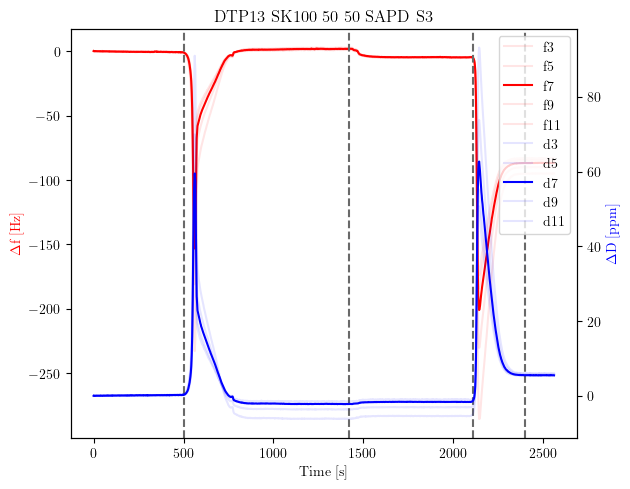

In [9]:
# DTP13 SK100 50 50 SAPD S3

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 50 50 SAPD S3.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

# # 0-500
# # 2400 -END

avg_red1 = np.average(f7_qcmd_30_70_SC[0:292])
avg_red2 = np.average(f7_qcmd_30_70_SC[1330:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

# plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$F [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SAPD S2", filename_to_save="DTP13 SAPD S2", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[14, "dimgray", "--"], [27.1, "dimgray", "--"], [41, "dimgray", "--"], [45, "dimgray", "--"]])



plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 50 50 SAPD S3", filename_to_save="python_figures/DTP13 SK100 50 50 SAPD S3", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[500, "dimgray", "--"], [1420, "dimgray", "--"], [2110, "dimgray", "--"], [2400, "dimgray", "--"]])

-92.110176558031


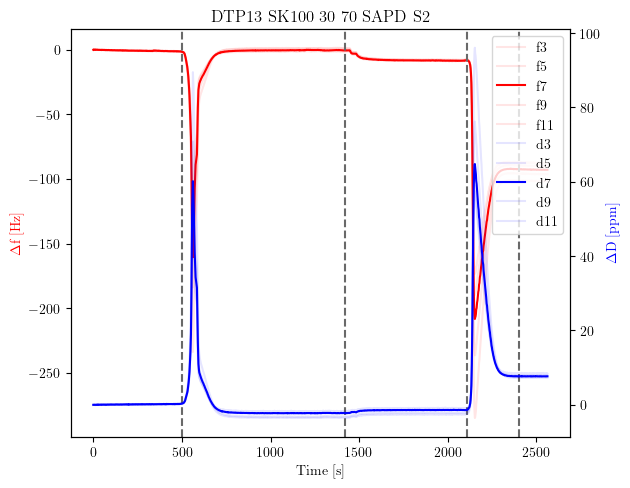

In [10]:
# DTP13 SK100 30 70 SAPD S2

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 30 70 SAPD S2.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm



# F1,D1,F13,D13



# y1 = [
#     # f1_qcmd_30_70_SC,
#     f3_qcmd_30_70_SC,
#     f5_qcmd_30_70_SC,
#     f7_qcmd_30_70_SC,
#     f9_qcmd_30_70_SC,
#     f11_qcmd_30_70_SC,
#     # f13_qcmd_30_70_SC
#     ]

# y2 = [
#     # d1_qcmd_30_70_SC,
#     d3_qcmd_30_70_SC,
#     d5_qcmd_30_70_SC,
#     d7_qcmd_30_70_SC,
#     d9_qcmd_30_70_SC,
#     d11_qcmd_30_70_SC,
#     # d13_qcmd_30_70_SC
# ]

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]


avg_red1 = np.average(f7_qcmd_30_70_SC[0:292])
avg_red2 = np.average(f7_qcmd_30_70_SC[1330:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 30 70 SAPD S2", filename_to_save="python_figures/DTP13 SK100 30 70 SAPD S2", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[500, "dimgray", "--"], [1420, "dimgray", "--"], [2110, "dimgray", "--"], [2400, "dimgray", "--"]])



-92.110176558031


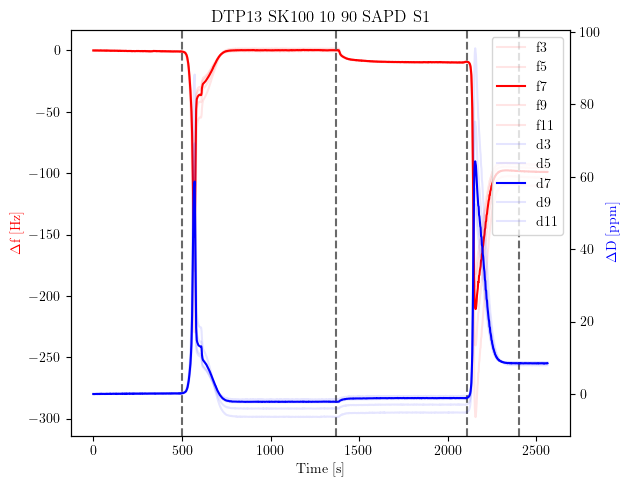

In [11]:
# DTP13 SK100 10 90 SAPD S1

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 10 90 SAPD S1.csv"

qcmd_10_90 = pd.read_csv(f_path, sep='\t')

t_qcmd_10_90 = qcmd_10_90.Time_s

f1_qcmd_10_90 = qcmd_10_90.f1_Hz
f3_qcmd_10_90 = qcmd_10_90.f3_Hz
f5_qcmd_10_90 = qcmd_10_90.f5_Hz
f7_qcmd_10_90 = qcmd_10_90.f7_Hz
f9_qcmd_10_90 = qcmd_10_90.f9_Hz
f11_qcmd_10_90 = qcmd_10_90.f11_Hz
f13_qcmd_10_90 = qcmd_10_90.f13_Hz

d1_qcmd_10_90 = qcmd_10_90.D1_ppm
d3_qcmd_10_90 = qcmd_10_90.D3_ppm
d5_qcmd_10_90 = qcmd_10_90.D5_ppm
d7_qcmd_10_90 = qcmd_10_90.D7_ppm
d9_qcmd_10_90 = qcmd_10_90.D9_ppm
d11_qcmd_10_90 = qcmd_10_90.D11_ppm
d13_qcmd_10_90 = qcmd_10_90.D13_ppm

# print((t_qcmd_10_90), (f1_qcmd_10_90), (d1_qcmd_10_90))


# F1,D1,F13,D13




y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_10_90, "f3"],
    [f5_qcmd_10_90, "f5"],
    [f7_qcmd_10_90, "f7"],
    [f9_qcmd_10_90, "f9"],
    [f11_qcmd_10_90, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_10_90, "d3"],
    [d5_qcmd_10_90, "d5"],
    [d7_qcmd_10_90, "d7"],
    [d9_qcmd_10_90, "d9"],
    [d11_qcmd_10_90, "d11"]
    # d13_qcmd_10_90_SC_SC
]


# 500, 2400
avg_red1 = np.average(f7_qcmd_30_70_SC[0:292])
avg_red2 = np.average(f7_qcmd_30_70_SC[1330:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_10_90, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 10 90 SAPD S1", filename_to_save="python_figures/DTP13 SK100 10 90 SAPD S1", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[500, "dimgray", "--"], [1370, "dimgray", "--"], [2110, "dimgray", "--"], [2400, "dimgray", "--"]])



# SC

-1.0572587505886046


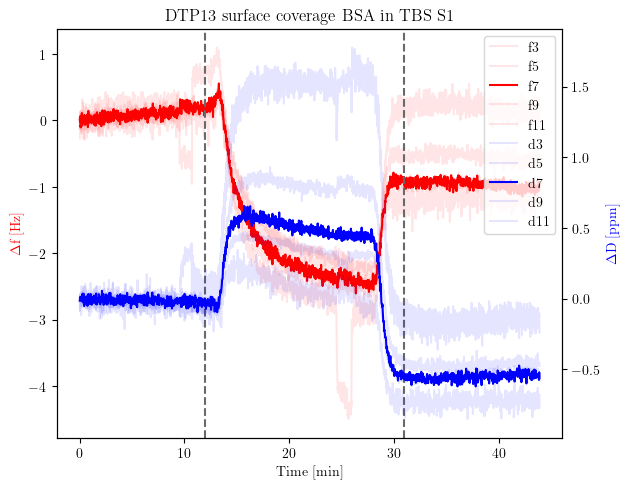

In [12]:
# DTP13 surface coverage BSA in TBS S1.csv

f_path = "data/Linus & Alicia miniLB and QCM/Linus & Alicia as csv/DTP13 SAPD method Alicia and Linus 240926/DTP13 surface coverage BSA in TBS S1.csv"

qcmd_30_70 = pd.read_csv(f_path, sep=',')

t_qcmd_30_70_SC = qcmd_30_70.Time_min

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

# d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

# 500, 2400
avg_red1 = np.average(f7_qcmd_30_70_SC[0:554])
avg_red2 = np.average(f7_qcmd_30_70_SC[1358:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 surface coverage BSA in TBS S1", filename_to_save="python_figures/DTP13 surface coverage BSA in TBS S1", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[12, "dimgray", "--"], [31, "dimgray", "--"]])




-1.3158120863254683


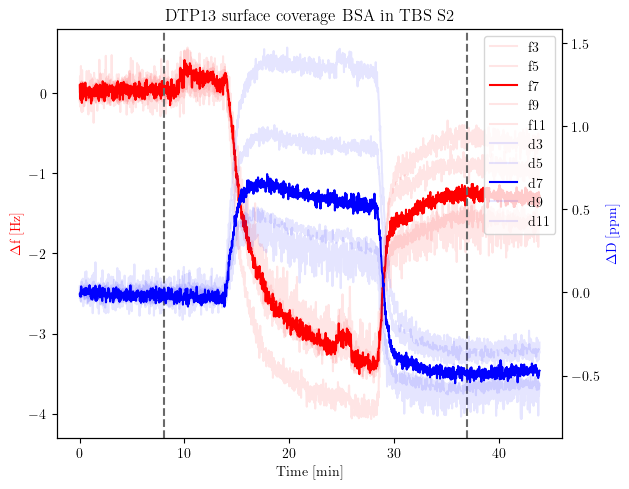

In [13]:
# DTP13 surface coverage BSA in TBS S2.csv

f_path = "data/Linus & Alicia miniLB and QCM/Linus & Alicia as csv/DTP13 SAPD method Alicia and Linus 240926/DTP13 surface coverage BSA in TBS S2.csv"

qcmd_30_70 = pd.read_csv(f_path, sep=',')

t_qcmd_30_70_SC = qcmd_30_70.Time_min

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

# d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:372])
avg_red2 = np.average(f7_qcmd_30_70_SC[1604:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 surface coverage BSA in TBS S2", filename_to_save="python_figures/DTP13 surface coverage BSA in TBS S2", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[8, "dimgray", "--"], [37, "dimgray", "--"]])




-0.9791069388100068


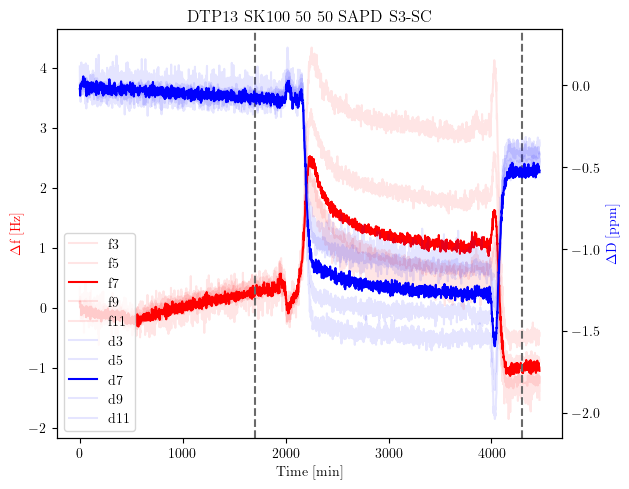

In [14]:
# DTP13 SK100 50 50 SAPD S3-SC

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 50 50 SAPD S3-SC.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:986])
avg_red2 = np.average(f7_qcmd_30_70_SC[2481:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 50 50 SAPD S3-SC", filename_to_save="python_figures/DTP13 SK100 50 50 SAPD S3-SC", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[1700, "dimgray", "--"], [4300, "dimgray", "--"]])


-4.642684465097485


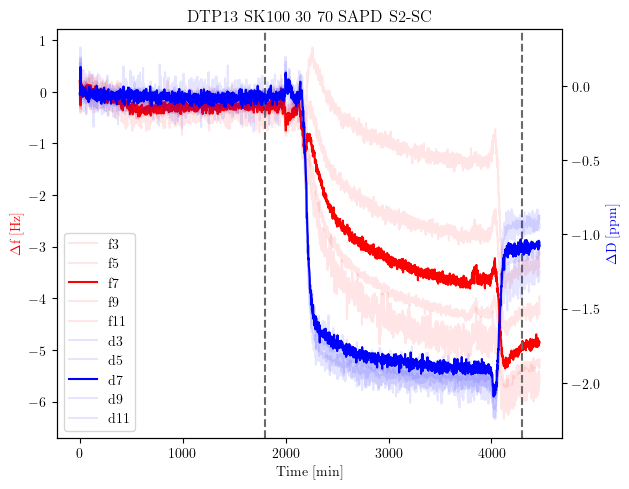

In [15]:
# DTP13 SK100 30 70 SAPD S2-SC

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 30 70 SAPD S2-SC.csv"

qcmd_30_70_SC = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70_SC.Time_s


f1_qcmd_30_70_SC = qcmd_30_70_SC.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70_SC.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70_SC.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70_SC.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70_SC.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70_SC.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70_SC.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70_SC.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70_SC.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70_SC.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70_SC.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70_SC.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70_SC.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70_SC.D13_ppm



y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:1042])
avg_red2 = np.average(f7_qcmd_30_70_SC[2482:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 30 70 SAPD S2-SC", filename_to_save="python_figures/DTP13 SK100 30 70 SAPD S2-SC", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[1800, "dimgray", "--"], [4300, "dimgray", "--"]])


-4.643868883957134


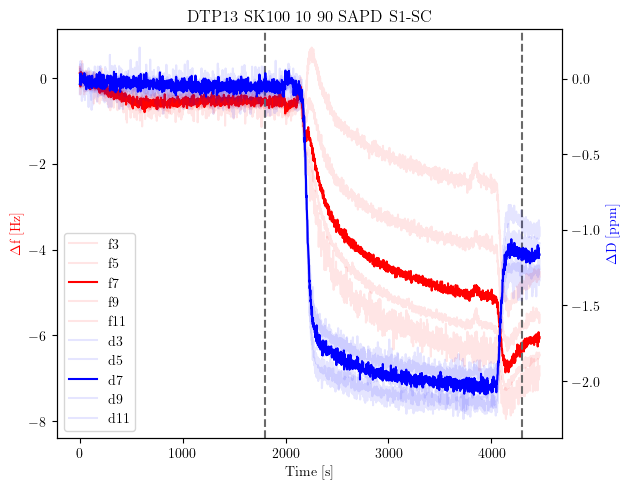

In [16]:
# DTP13 SK100 10 90 SAPD S1-SC.csv

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 10 90 SAPD S1-SC.csv"

qcmd_10_90 = pd.read_csv(f_path, sep='\t')

t_qcmd_10_90_SC = qcmd_10_90.Time_s

f1_qcmd_10_90_SC = qcmd_10_90.f1_Hz
f3_qcmd_10_90_SC = qcmd_10_90.f3_Hz
f5_qcmd_10_90_SC = qcmd_10_90.f5_Hz
f7_qcmd_10_90_SC = qcmd_10_90.f7_Hz
f9_qcmd_10_90_SC = qcmd_10_90.f9_Hz
f11_qcmd_10_90_SC = qcmd_10_90.f11_Hz
f13_qcmd_10_90_SC = qcmd_10_90.f13_Hz

d1_qcmd_10_90_SC = qcmd_10_90.D1_ppm
d3_qcmd_10_90_SC = qcmd_10_90.D3_ppm
d5_qcmd_10_90_SC = qcmd_10_90.D5_ppm
d7_qcmd_10_90_SC = qcmd_10_90.D7_ppm
d9_qcmd_10_90_SC = qcmd_10_90.D9_ppm
d11_qcmd_10_90_SC = qcmd_10_90.D11_ppm
d13_qcmd_10_90_SC = qcmd_10_90.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_10_90_SC, "f3"],
    [f5_qcmd_10_90_SC, "f5"],
    [f7_qcmd_10_90_SC, "f7"],
    [f9_qcmd_10_90_SC, "f9"],
    [f11_qcmd_10_90_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_10_90_SC, "d3"],
    [d5_qcmd_10_90_SC, "d5"],
    [d7_qcmd_10_90_SC, "d7"],
    [d9_qcmd_10_90_SC, "d9"],
    [d11_qcmd_10_90_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:1042])
avg_red2 = np.average(f7_qcmd_30_70_SC[2481:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_10_90_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 10 90 SAPD S1-SC", filename_to_save="python_figures/DTP13 SK100 10 90 SAPD S1-SC", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[1800, "dimgray", "--"], [4300, "dimgray", "--"]])



# SAPD + SC

-101.6103992977179
-2.7191405454671695


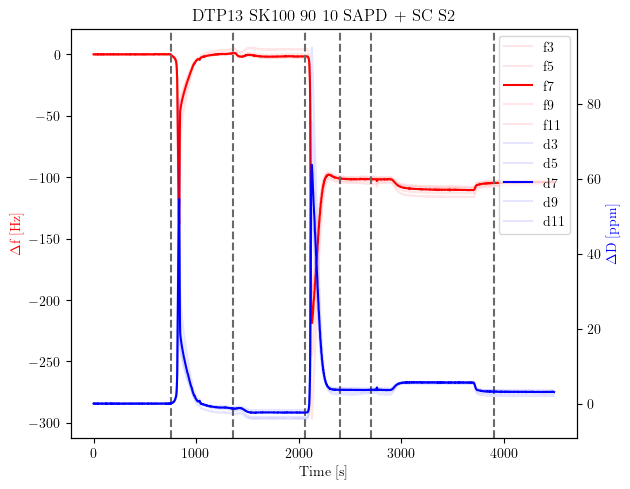

In [17]:
# DTP13 SK100 90 10 SAPD + SC S2

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 90 10 SAPD + SC S2.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:434])
avg_red2 = np.average(f7_qcmd_30_70_SC[1328:1495])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

avg_red1 = np.average(f7_qcmd_30_70_SC[1328:1494])
avg_red2 = np.average(f7_qcmd_30_70_SC[2176:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

# 0-750 s
# 2400 - 2700 s

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 90 10 SAPD + SC S2", filename_to_save="python_figures/DTP13 SK100 90 10 SAPD + SC S2", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[750, "dimgray", "--"], [1360, "dimgray", "--"], [2060, "dimgray", "--"], [2400, "dimgray", "--"], [2700, "dimgray", "--"], [3900, "dimgray", "--"]])



-105.19073992521868
-3.395930941005389


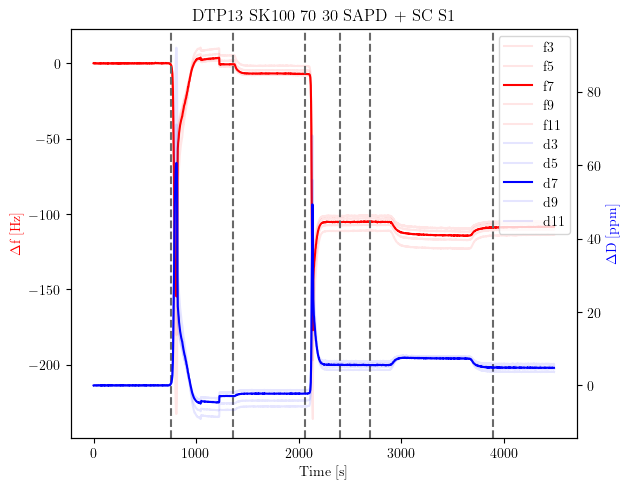

In [18]:
# DTP13 SK100 70 30 SAPD + SC S1

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/DTP13 SK100 70 30 SAPD + SC S1.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]



avg_red1 = np.average(f7_qcmd_30_70_SC[0:434])
avg_red2 = np.average(f7_qcmd_30_70_SC[1328:1495])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

avg_red1 = np.average(f7_qcmd_30_70_SC[1328:1494])
avg_red2 = np.average(f7_qcmd_30_70_SC[2176:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

# 0-750 s
# 2400 - 2700 s

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 SK100 70 30 SAPD + SC S1", filename_to_save="python_figures/DTP13 SK100 70 30 SAPD + SC S1", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[750, "dimgray", "--"], [1360, "dimgray", "--"], [2060, "dimgray", "--"], [2400, "dimgray", "--"], [2700, "dimgray", "--"], [3900, "dimgray", "--"]])



-59.99699723088385
-3.6791580141077134


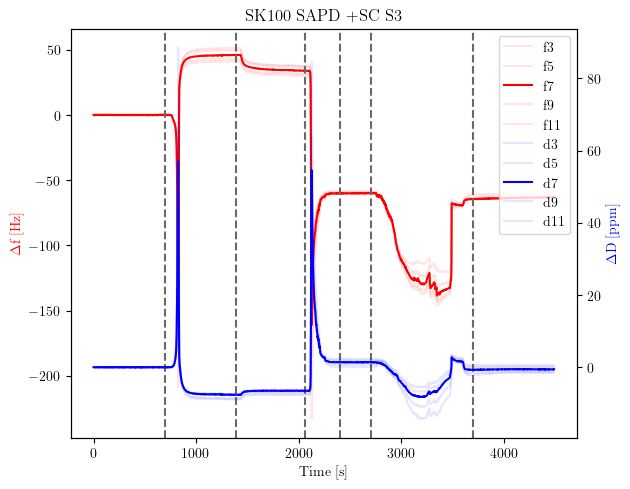

In [19]:
# SK100 SAPD +SC S3

f_path = "data/Alicia and Linus QCM-D SAPD + AFM images/Excel files/SK100 SAPD +SC S3.csv"

qcmd_30_70 = pd.read_csv(f_path, sep='\t')

t_qcmd_30_70_SC = qcmd_30_70.Time_s

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]


avg_red1 = np.average(f7_qcmd_30_70_SC[0:434])
avg_red2 = np.average(f7_qcmd_30_70_SC[1328:1495])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

avg_red1 = np.average(f7_qcmd_30_70_SC[1328:1494])
avg_red2 = np.average(f7_qcmd_30_70_SC[2055:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)

# 0-750 s
# 2400 - 2700 s

plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [s]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="SK100 SAPD +SC S3", filename_to_save="python_figures/SK100 SAPD +SC S3", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[700, "dimgray", "--"], [1390, "dimgray", "--"], [2060, "dimgray", "--"], [2400, "dimgray", "--"], [2700, "dimgray", "--"], [3700, "dimgray", "--"]])



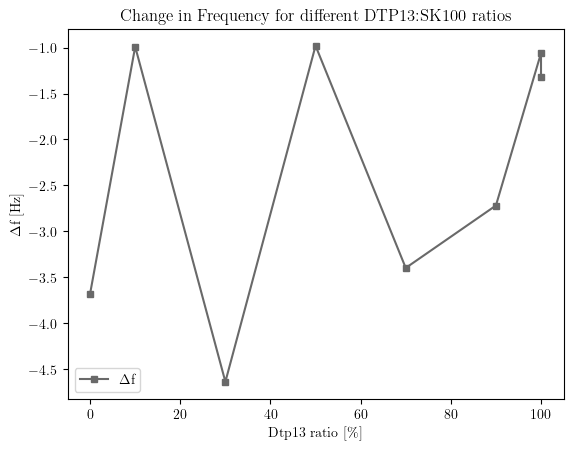

,DTP13_Sk100,SH_Hz,baseline,SC
0,0,-3.68,-21.705,83.045381
1,10,-0.99,-21.705,95.438839
2,30,-4.64,-21.705,78.622437
3,50,-0.98,-21.705,95.484911
4,70,-3.40,-21.705,84.335407
5,90,-2.72,-21.705,87.468325
6,100,-1.06,-21.705,95.116333
7,100,-1.32,-21.705,93.918452


In [20]:
# SC comparison

f_path = "data/SC_data.csv"

sc_data = pd.read_csv(f_path, sep=',')

x_sc_data_dtp_ratio = sc_data.DTP13_Sk100
y_sc_data = sc_data.SH_Hz

plot_with_one_axis(x_sc_data_dtp_ratio, y_sc_data, r"Dtp13 ratio [$\%$]", r"$\Delta$f [Hz]", plot_title="Change in Frequency for different DTP13:SK100 ratios", filename_to_save="python_figures/Change in Frequency for different DTP13_SK100 ratios", label=r"$\Delta$f", linstyle="-", colorr="dimgray", marker_type="s", marker_size="5")


sc_data

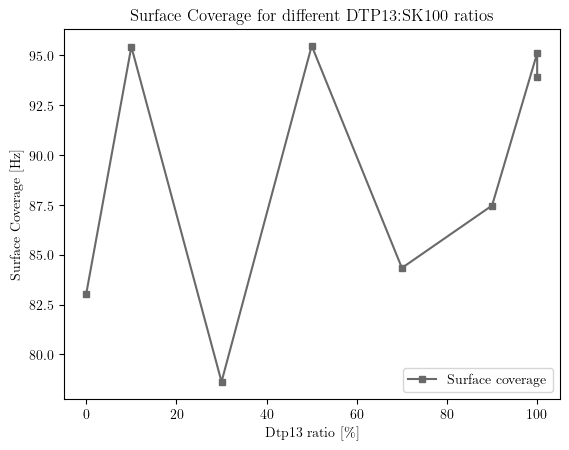

In [21]:
# SC comparison

f_path = "data/SC_data.csv"

sc_data = pd.read_csv(f_path, sep=',')

x_sc_data_dtp_ratio = sc_data.DTP13_Sk100
y_sc_data_SC = sc_data.SC

plot_with_one_axis(x_sc_data_dtp_ratio, y_sc_data_SC, r"Dtp13 ratio [$\%$]", r"Surface Coverage [Hz]", plot_title="Surface Coverage for different DTP13:SK100 ratios", filename_to_save="python_figures/Surface Coverage calculation", label=r"Surface coverage", linstyle="-", colorr="dimgray", marker_type="s", marker_size="5")

# Files named "Linus und Alicia"

-21.704761986072505


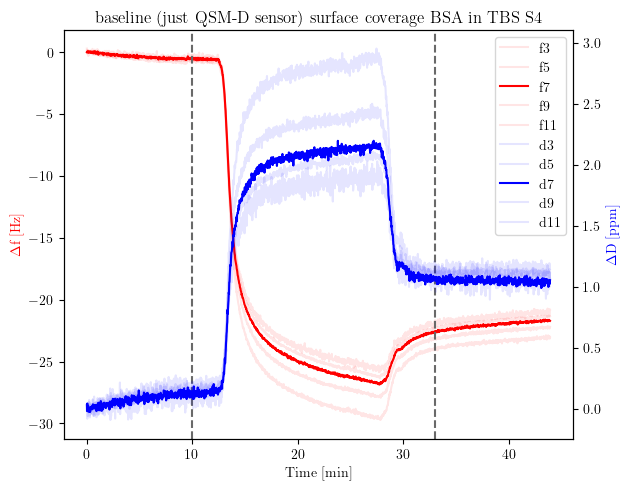

In [22]:
# baseline (just QSM-D sensor) surface coverage BSA in TBS S4

f_path = "data/Linus & Alicia miniLB and QCM/Linus & Alicia as csv/DTP13 SAPD method Alicia and Linus 240926/baseline (just QSM-D sensor) surface coverage BSA in TBS S4.csv"

qcmd_30_70 = pd.read_csv(f_path, sep=',')

t_qcmd_30_70_SC = qcmd_30_70.Time_min

f1_qcmd_30_70_SC = qcmd_30_70.f1_Hz
f3_qcmd_30_70_SC = qcmd_30_70.f3_Hz
f5_qcmd_30_70_SC = qcmd_30_70.f5_Hz
f7_qcmd_30_70_SC = qcmd_30_70.f7_Hz
f9_qcmd_30_70_SC = qcmd_30_70.f9_Hz
f11_qcmd_30_70_SC = qcmd_30_70.f11_Hz
f13_qcmd_30_70_SC = qcmd_30_70.f13_Hz

# d1_qcmd_30_70_SC = qcmd_30_70.D1_ppm
d3_qcmd_30_70_SC = qcmd_30_70.D3_ppm
d5_qcmd_30_70_SC = qcmd_30_70.D5_ppm
d7_qcmd_30_70_SC = qcmd_30_70.D7_ppm
d9_qcmd_30_70_SC = qcmd_30_70.D9_ppm
d11_qcmd_30_70_SC = qcmd_30_70.D11_ppm
d13_qcmd_30_70_SC = qcmd_30_70.D13_ppm

# F1,D1,F13,D13

y1 = [
    # f1_qcmd_10_90_SC,
    [f3_qcmd_30_70_SC, "f3"],
    [f5_qcmd_30_70_SC, "f5"],
    [f7_qcmd_30_70_SC, "f7"],
    [f9_qcmd_30_70_SC, "f9"],
    [f11_qcmd_30_70_SC, "f11"]
    # f13_qcmd_10_90_SC
    ]

y2 = [
    # d1_qcmd_10_90_SC,
    [d3_qcmd_30_70_SC, "d3"],
    [d5_qcmd_30_70_SC, "d5"],
    [d7_qcmd_30_70_SC, "d7"],
    [d9_qcmd_30_70_SC, "d9"],
    [d11_qcmd_30_70_SC, "d11"]
    # d13_qcmd_10_90_SC_SC
]

avg_red1 = np.average(f7_qcmd_30_70_SC[0:463])
avg_red2 = np.average(f7_qcmd_30_70_SC[1441:])
deltaF = (avg_red2 - avg_red1)
print(deltaF)


plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$f [Hz]", r"$\Delta$D [ppm]", plot_title="baseline (just QSM-D sensor) surface coverage BSA in TBS S4", filename_to_save="python_figures/baseline (just QSM-D sensor) surface coverage BSA in TBS S4", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[10, "dimgray", "--"], [33, "dimgray", "--"]])



# plot_with_two_axes_with_N_curves_with_VERTICAL_lines(t_qcmd_30_70_SC, y1, y2, "Time [min]", r"$\Delta$F [Hz]", r"$\Delta$D [ppm]", plot_title="DTP13 surface coverage BSA in TBS S1", filename_to_save="python_figures/DTP13 surface coverage BSA in TBS S1", col1="red", col2="lightcoral", col3="blue", label1="label1", label2="label2", label3="label3", vlines=[[1700, "dimgray", "--"], [4300, "dimgray", "--"]])



# QCMD FORMULA

In [23]:
def QCMD_plot_with_one_axis_with_points(list_of_data:list, name_x="x", name_y="y", plot_title="title", filename_to_save="nopdf", marker_type="o", marker_size="5"): # [data_x, data_y, label, colorr, line_style]
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data

    
    
    for l in list_of_data:
        data_x, data_y, label, colorr, line_style = l
        plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle=line_style, color=colorr, markersize=marker_size) # color='red')
    
    plt.plot(0, -445.403271291596)
    

    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".svg"
        plt.savefig(fnts)

    plt.show()

In [24]:
def plot_with_one_axis_with_points(list_of_data:list, list_of_points:list, name_x="x", name_y="y", plot_title="title", filename_to_save="nopdf", marker_type="o", marker_size="5"): #, xmin=0, xmax=500000, ymin=0, ymax=1000):
    plt.figure()  # No need for subplots when using a single axis
    
    # Plot data

    # [data_x, data_y, label, color]
    
    for l in list_of_data:
        data_x, data_y, label, colorr, line_style = l
        plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle=line_style, color=colorr, markersize=marker_size) # color='red')
    
    for p in list_of_points:
        # plt.plot(data_x, data_y, label=label, marker=marker_type, linestyle=line_style, color=colorr, markersize=marker_size)

        x_val, y_val, labell, markerr, markersizee, colorr = p

        plt.plot(x_val, y_val, label=labell, marker=markerr, markersize=markersizee, color=colorr)
    
    # Label the axes
    plt.xlabel(name_x) 
    plt.ylabel(name_y) #, color='red')
    
    # Set axis limits
    # plt.xlim([xmin, xmax])
    # plt.ylim([ymin, ymax])
    
    # Set title and legend
    plt.title(plot_title)
    plt.legend(loc='best')
    
    # Save and show the plot
    if filename_to_save != "nopdf":
        fnts = filename_to_save + ".svg"
        plt.savefig(fnts)

    plt.show()

0 -78.97


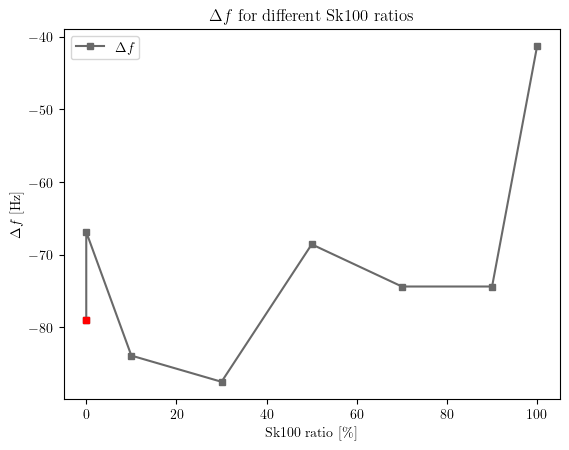

In [25]:
f_path = "data/qcmd_delta_f.csv"

qcmd_delta_f = pd.read_csv(f_path, sep=',')

x_sk100 = qcmd_delta_f.sk100
y_SF = qcmd_delta_f.real_delta_f

print(x_sk100[0], y_SF[0])

lll = [[x_sk100, y_SF, r"$\Delta f$", "dimgray", "-"]]

ppp = [[x_sk100[0], y_SF[0], "", "s", 5, "red"]]

plot_with_one_axis_with_points(lll, ppp, name_x=r"Sk100 ratio [$\%$]", name_y=r"$\Delta f$ [Hz]", plot_title=r"$\Delta f$ for different Sk100 ratios", filename_to_save="python_figures/f for different sk100 ratios", marker_type="s", marker_size="5") #, xmin=0, xmax=500000, ymin=0, ymax=1000):

# Mass

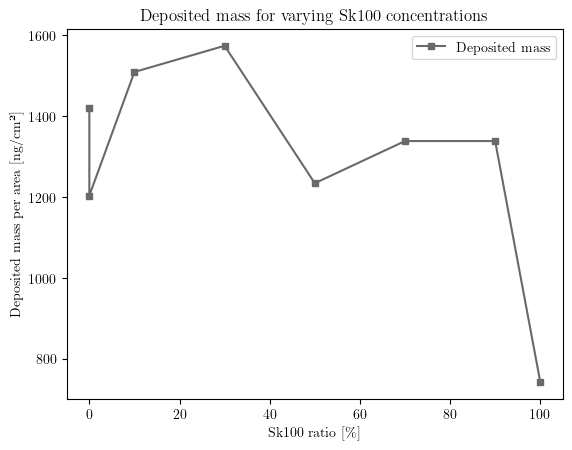

In [37]:
# sk100,C,unit,n,delta_f,delta_m,unit


f_path = "data/SC_mass.csv"
SC_mass = pd.read_csv(f_path, sep=',')

x_SC_mass = SC_mass.sk100
y_SC_mass = SC_mass.delta_m

plot_with_one_axis(x_SC_mass, y_SC_mass, r"Sk100 ratio [$\%$]", "Deposited mass per area [ng/cm²]", plot_title="Deposited mass for varying Sk100 concentrations", filename_to_save="python_figures/SC_sauerbrey", label="Deposited mass", linstyle="-", colorr="dimgray", marker_type="s", marker_size="5")

